In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,15]
import seaborn as sns
sns.set(palette='bright')

In [2]:
c = plt.get_cmap('prism')

In [3]:
cases = pd.read_csv('Cases_Time_Series_CAMCAR_All.csv', index_col=0)
deaths = pd.read_csv('Deaths_Time_Series_CAMCAR_All.csv', index_col=0)
recovered = pd.read_csv('Recovered_Time_Series_CAMCAR_All.csv', index_col=0)
active = pd.read_csv('Active_CAMCAR_All.csv', index_col=0) 

In [4]:
gf = pd.read_csv('Growth_Factor_CAMCAR_All.csv', index_col=0)

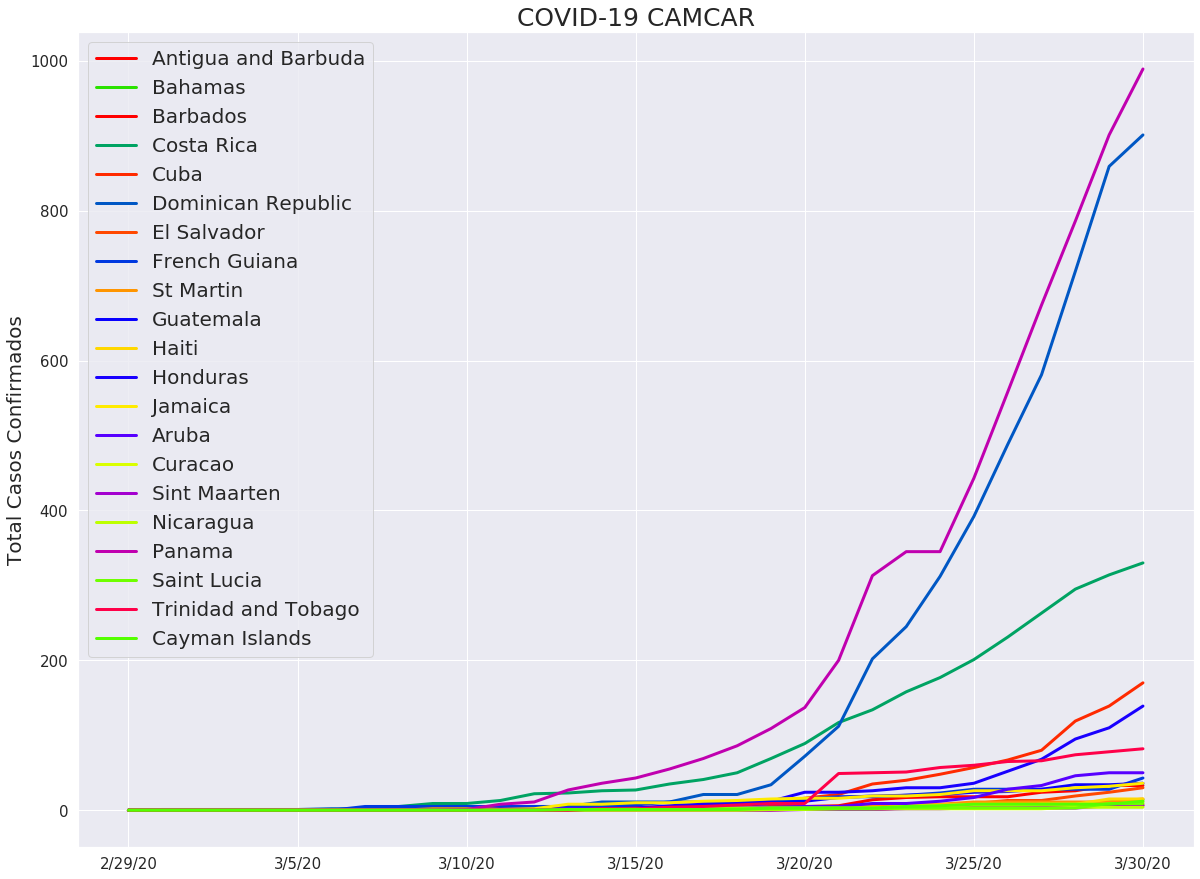

In [14]:
cases.plot(kind='line', linewidth=3, cmap=c)
plt.title('COVID-19 CAMCAR', fontsize=25)
plt.ylabel('Total Casos Confirmados', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
plt.show()

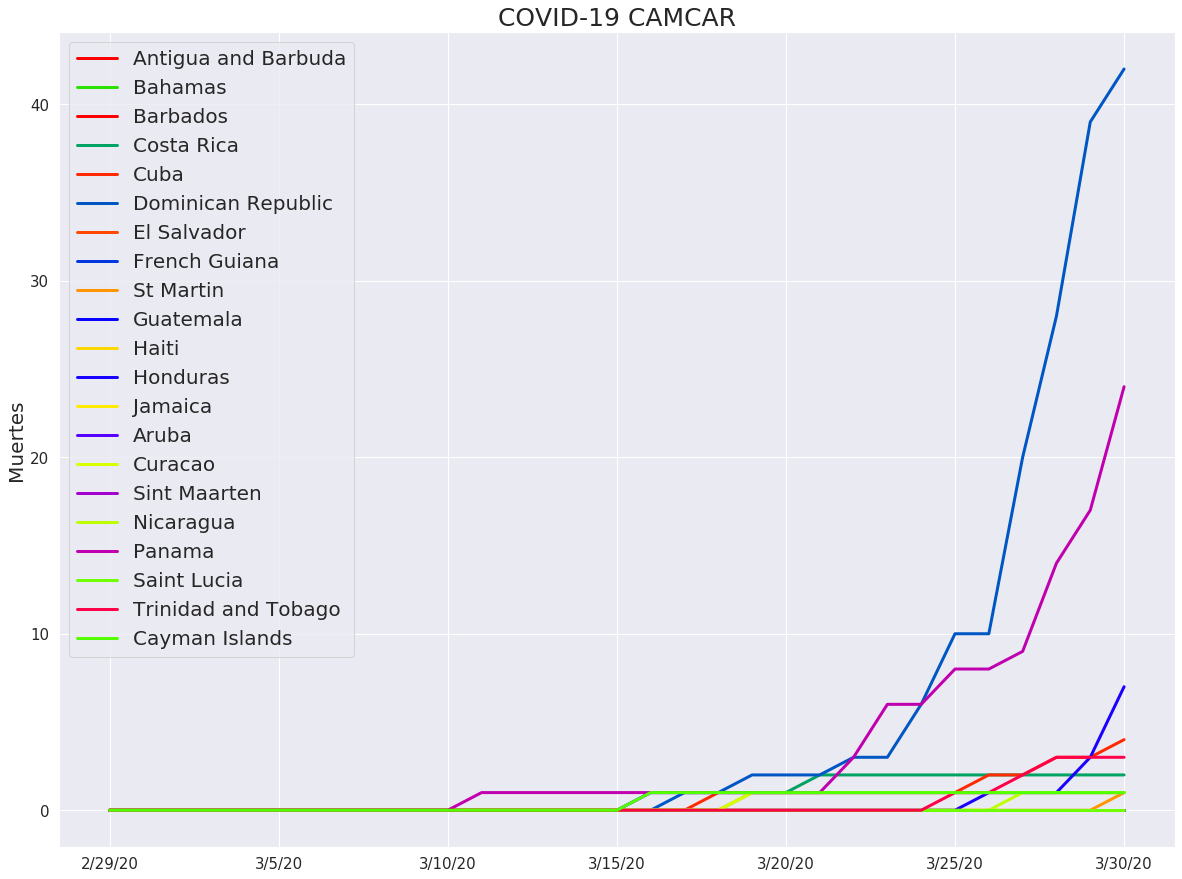

In [15]:
deaths.plot(kind='line', linewidth=3, cmap=c)
plt.title('COVID-19 CAMCAR', fontsize=25)
plt.ylabel('Muertes', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=20)
plt.show()

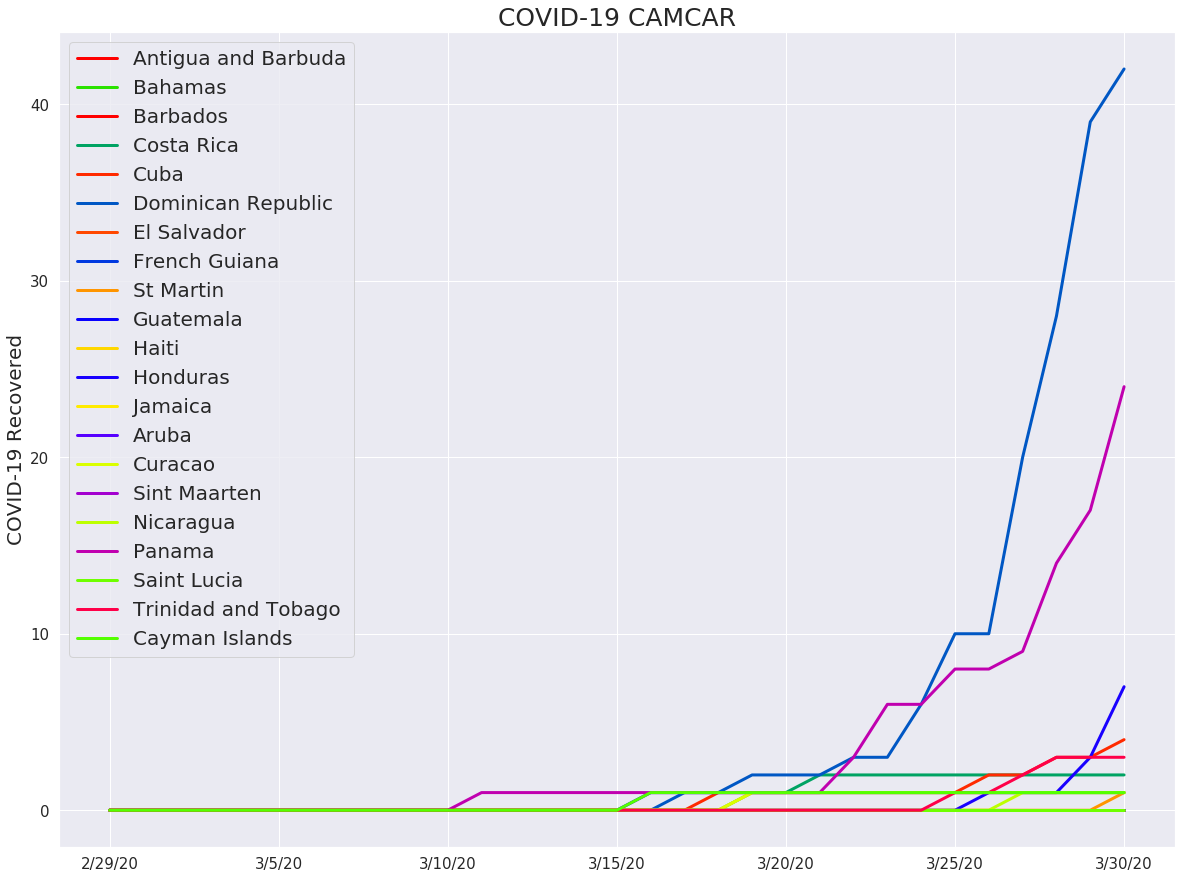

In [16]:
recovered.plot(kind='line', linewidth=3, cmap=c)
plt.title('COVID-19 CAMCAR', fontsize=25)
plt.ylabel('COVID-19 Recovered', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
plt.show()

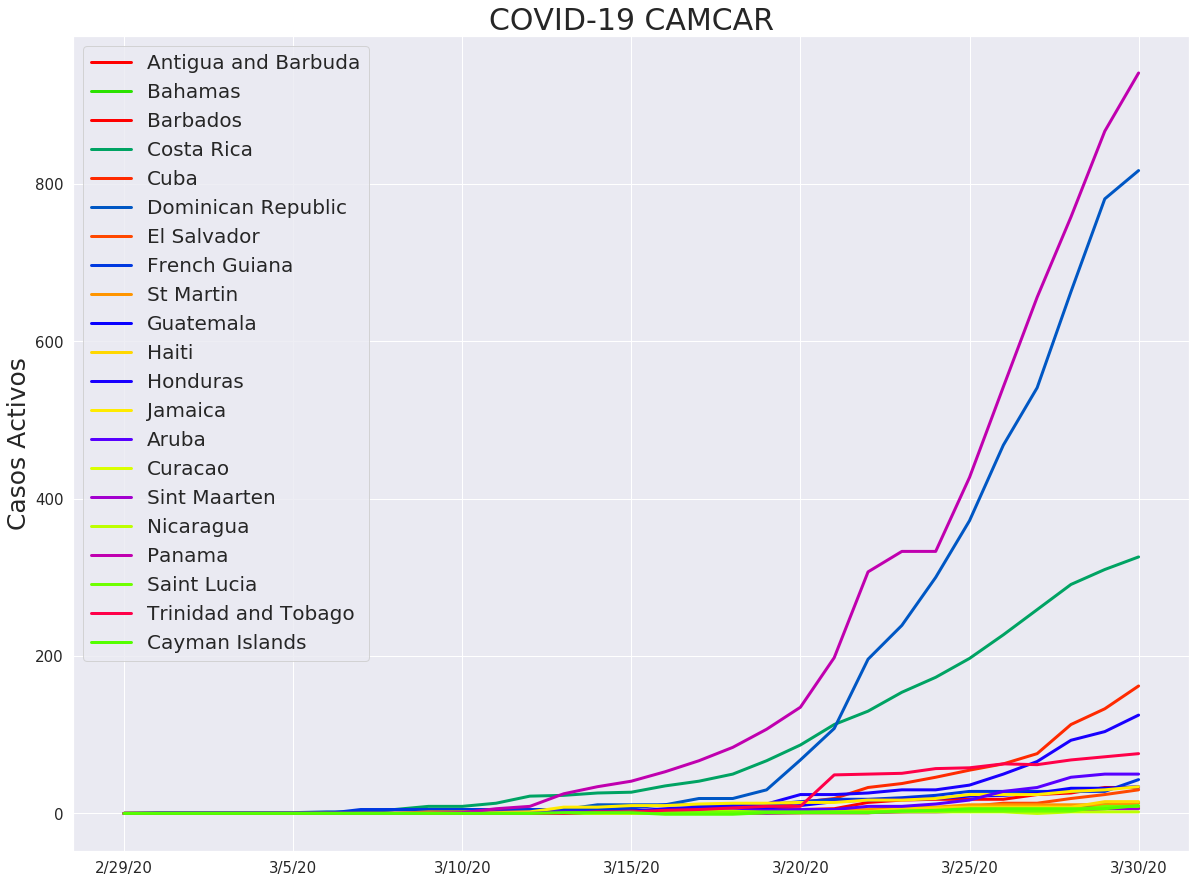

In [13]:
active.plot(kind='line', linewidth=3, cmap=c)
plt.title('COVID-19 CAMCAR', fontsize=30)
plt.ylabel('Casos Activos', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
plt.show()

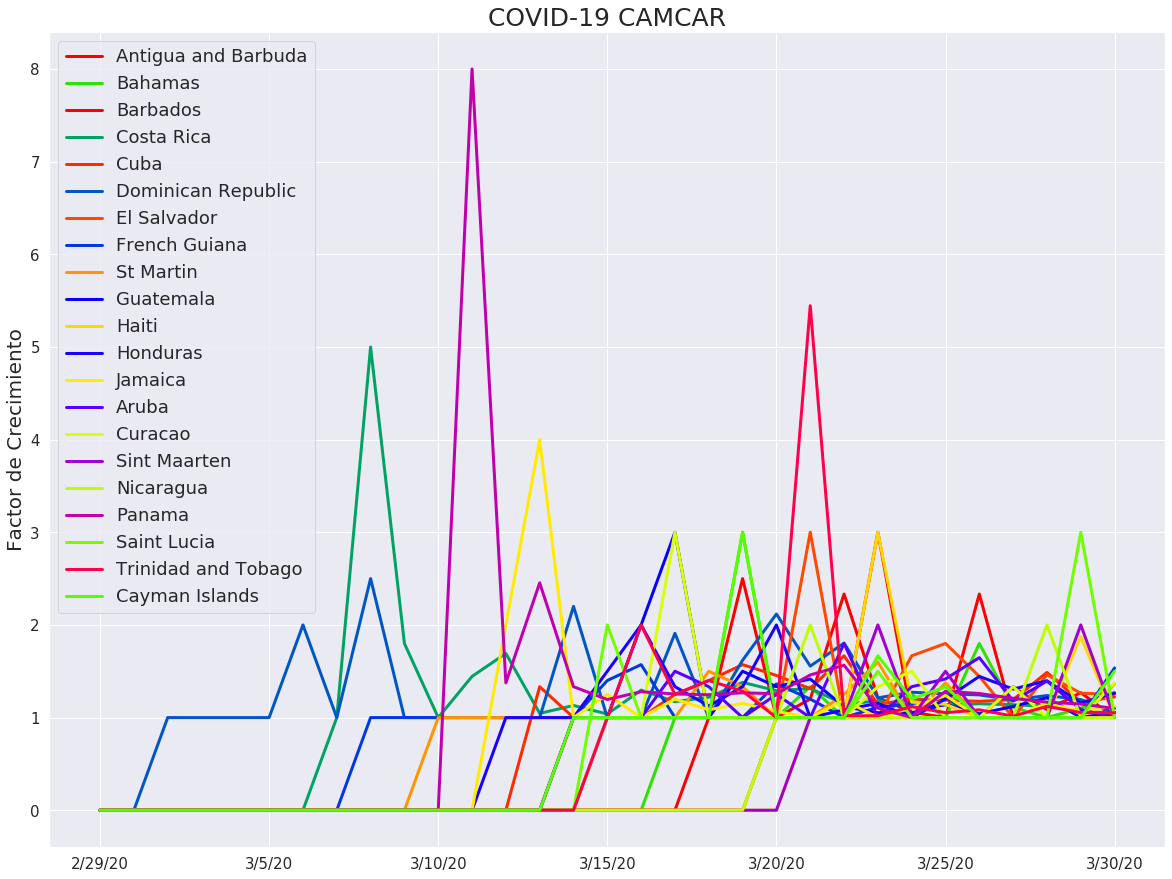

In [18]:
gf.plot(kind='line', linewidth=3, cmap=c)
plt.title('COVID-19 CAMCAR', fontsize=25)
plt.ylabel('Factor de Crecimiento', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=18)
plt.show()

In [10]:
new_per_day = cases.diff().dropna()

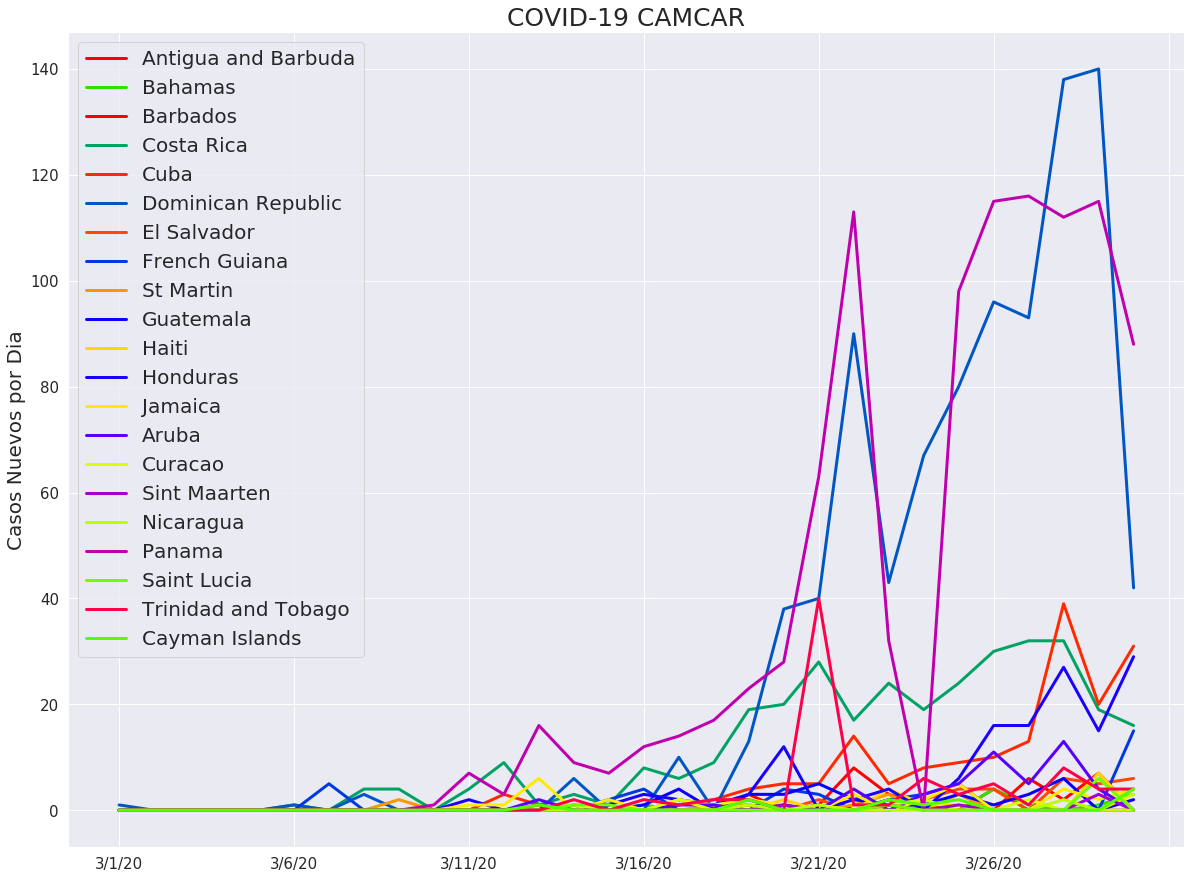

In [19]:
new_per_day.plot(kind='line', linewidth=3, cmap=c)
plt.title('COVID-19 CAMCAR', fontsize=25)
plt.ylabel('Casos Nuevos por Dia', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
plt.show()

In [28]:
largest = cases.iloc[-1,:] > cases.iloc[-1,:].quantile(0.5)
largest.index[0]

'Antigua and Barbuda'

In [29]:
names_of_largest = [largest.index[i] for i in range(len(largest)) if largest[i] == True]
names_of_largest

['Costa Rica',
 'Cuba',
 'Dominican Republic',
 'French Guiana',
 'Guatemala',
 'Honduras',
 'Jamaica',
 'Aruba',
 'Panama',
 'Trinidad and Tobago']

In [ ]:
### Func to average time series timepoint in chunks of d days

def d_days_avg(df, d):
    

In [35]:
cases.index[2]

'3/2/20'